In [1]:
!pip install pillow
!pip install transformers
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install transformers torch accelerate sentencepiece
!pip install python-dotenv
!pip install groq

Looking in indexes: https://download.pytorch.org/whl/cpu


In [2]:
import os
from io import BytesIO
from IPython.display import display 
from PIL import Image
import base64
import requests
from transformers import pipeline
from transformers import AutoModelForCausalLM, AutoTokenizer
from dotenv import load_dotenv
from huggingface_hub import login
from groq import Groq

In [3]:
load_dotenv()

True

In [4]:
hf_var=os.getenv("HF_TOKEN")

In [5]:
login(hf_var)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [7]:
from transformers import pipeline 

get_completion = pipeline("image-to-text", model = "Salesforce/blip-image-captioning-base")


Device set to use cpu


In [8]:
image_path = "Cat03.jpg"  

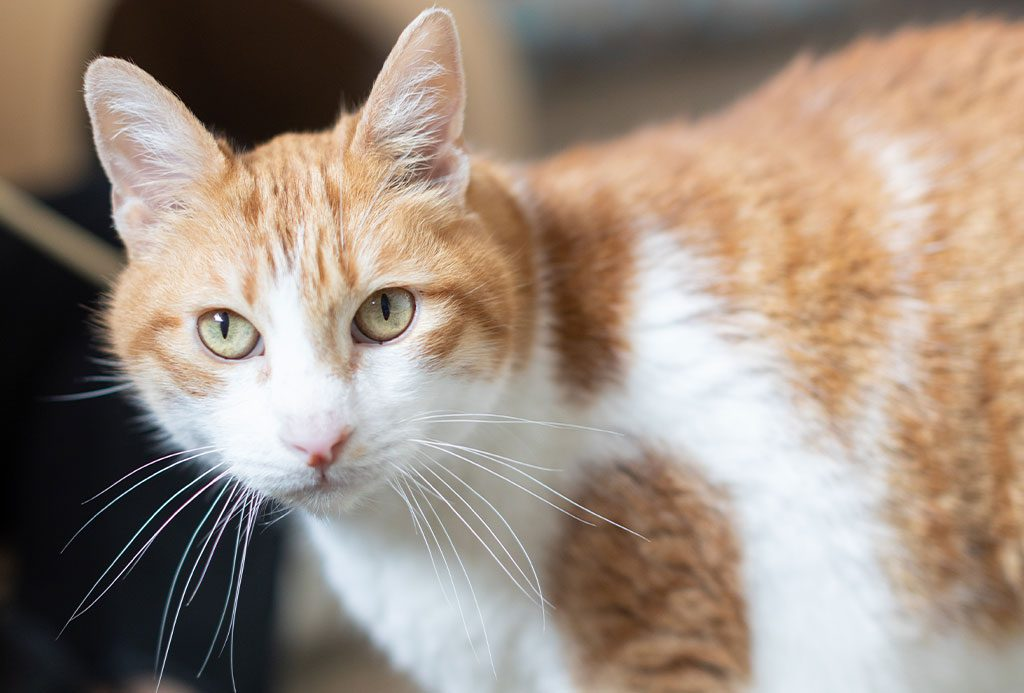

In [9]:
from PIL import Image
from IPython.display import display 

def show_image(image_path):
    image = Image.open(image_path)
    display(image) 
show_image(image_path)

In [9]:

def generate_completion(image_path):
    get_completion = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
    
    # Abre la imagen correctamente
    image = Image.open(image_path)
    
    # Genera la descripción
    caption = get_completion(image)
    
    return caption[0]['generated_text']

image_path = "Cat03.jpg"  # Asegúrate de cambiar esto por la ruta correcta
description = generate_completion(image_path)

print("Descripción generada:", description)

Device set to use cpu


Descripción generada: a cat with a white face


In [11]:

# Obtener la API Key desde las variables de entorno
api_key = os.getenv("GROQ_API_KEY")

if not api_key:
    raise ValueError("❌ GROQ_API_KEY no está configurado en las variables de entorno.")

# Crear instancia del cliente Groq
client = Groq(api_key=api_key)

# Descripción de la imagen
description = "A mystical forest where glowing creatures roam under a violet sky."

if not description.strip():
    raise ValueError("❌ La descripción de la imagen está vacía.")

# Generar la historia
chat_completion = client.chat.completions.create(
    model="llama-3.3-70b-versatile",
    messages=[
        {"role": "user", "content": f"Crea una historia con la siguiente descripción en español en un solo parrafo corto: {description}"},
    ],
)

# Imprimir la historia generada
print("\n📖 Historia Generada:\n")
print(chat_completion.choices[0].message.content)


📖 Historia Generada:

En el corazón de un bosque misterioso, donde el cielo se tiñe de un violeta etéreo, criaturas luminosas deambulan con gracia bajo la luz suave y mágica que las rodea. Los árboles, cubiertos de musgo resplandeciente, parecen guardar secretos antiguos mientras las hojas susurran historias olvidadas al viento. Con cada paso, la atmósfera se llena de un brillo suave y etéreo, como si el propio bosque estuviera vivo y compartiendo sus misterios con aquellos que se atreven a adentrarse en su mundo encantado.
